In [117]:
import pandas as pd
import math
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [118]:
df = pd.read_csv("../csvs/top_10000_1960-now.csv")
# 

In [119]:
df.columns

Index(['Track URI', 'Track Name', 'Artist URI(s)', 'Artist Name(s)',
       'Album URI', 'Album Name', 'Album Artist URI(s)',
       'Album Artist Name(s)', 'Album Release Date', 'Album Image URL',
       'Disc Number', 'Track Number', 'Track Duration (ms)',
       'Track Preview URL', 'Explicit', 'Popularity', 'ISRC', 'Added By',
       'Added At', 'Artist Genres', 'Danceability', 'Energy', 'Key',
       'Loudness', 'Mode', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Time Signature', 'Album Genres',
       'Label', 'Copyrights'],
      dtype='object')

In [120]:
df.head()

,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,...,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Album Genres,Label,Copyrights
0,spotify:track:1XAZlnVtthcDZt2NI1Dtxo,Justified & Ancient - Stand by the Jams,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,spotify:album:4MC0ZjNtVP1nDD5lsLxFjc,Songs Collection,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,1992-08-03,https://i.scdn.co/image/ab67616d0000b27355346b...,...,0.0480,0.0158,0.112000,0.4080,0.504,111.458,4.0,NaN,Jams Communications,"C 1992 Copyright Control, P 1992 Jams Communic..."
1,spotify:track:6a8GbQIlV8HBUW3c6Uk9PH,I Know You Want Me (Calle Ocho),spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,spotify:album:5xLAcbvbSAlRtPXnKkggXA,Pitbull Starring In Rebelution,spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,2009-10-23,https://i.scdn.co/image/ab67616d0000b27326d73a...,...,0.1490,0.0142,0.000021,0.2370,0.800,127.045,4.0,NaN,Mr.305/Polo Grounds Music/J Records,"P (P) 2009 RCA/JIVE Label Group, a unit of Son..."
2,spotify:track:70XtWbcVZcpaOddJftMcVi,From the Bottom of My Broken Heart,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,spotify:album:3WNxdumkSMGMJRhEgK80qx,...Baby One More Time (Digital Deluxe Version),spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,1999-01-12,https://i.scdn.co/image/ab67616d0000b2738e4986...,...,0.0305,0.5600,0.000001,0.3380,0.706,74.981,4.0,NaN,Jive,P (P) 1999 Zomba Recording LLC
3,spotify:track:1NXUWyPJk5kO6DQJ5t7bDu,Apeman - 2014 Remastered Version,spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,spotify:album:6lL6HugNEN4Vlc8sj0Zcse,"Lola vs. Powerman and the Moneygoround, Pt. On...",spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,2014-10-20,https://i.scdn.co/image/ab67616d0000b2731e7c53...,...,0.2590,0.5680,0.000051,0.0384,0.833,75.311,4.0,NaN,Sanctuary Records,"C © 2014 Sanctuary Records Group Ltd., a BMG C..."
4,spotify:track:72WZtWs6V7uu3aMgMmEkYe,You Can't Always Get What You Want,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,spotify:album:0c78nsgqX6VfniSNWIxwoD,Let It Bleed,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,1969-12-05,https://i.scdn.co/image/ab67616d0000b27373d927...,...,0.0687,0.6750,0.000073,0.2890,0.497,85.818,4.0,NaN,Universal Music Group,"C © 2002 ABKCO Music & Records Inc., P ℗ 2002 ..."


This data set is a collection of the Top 100000 songs in the spotify api, it was scrapped using that, by ordering in the number of downloads and getting the top 10000
.

Step 1: Brief Description of the data and a summary of its attributes.
Most of the columns are self explanatory, but i would like to detail these:
- ISRC: This the id of the song
- Danceability:  Danceability measures how suitable a song is for dancing based on various musical elements, like tempo.
- Energy: Energy reflects the intensity and activity of a song, High-energy songs often have a fast tempo, loud dynamics, and an overall sense of intensity.
- Liveness: Liveness measures the presence of an audience or the sense of a live performance in a recording, usually it means how "raw" a perfomance is, so a stupid perfomance tend to be less "raw" and more programmed.
- Valence: Valence measures the musical positiveness or mood of a song. A high valence score indicates a more positive, happy, or cheerful mood.

Step 2: Initial plan for data exploration.
- There are a lot of columns, i am going to remove some that i dont find useful.

In [121]:
# Removing columns

df = df.drop(columns=['Track URI', 'ISRC', 'Copyrights', 'Album Image URL', 'Album URI', 'Added By', 'Added At', 'Album Genres', 'Track Number', 'Label', 'Key', 'Track Preview URL', 'Disc Number', 'Mode', 'Time Signature'])

In [122]:
df.columns

Index(['Track Name', 'Artist URI(s)', 'Artist Name(s)', 'Album Name',
       'Album Artist URI(s)', 'Album Artist Name(s)', 'Album Release Date',
       'Track Duration (ms)', 'Explicit', 'Popularity', 'Artist Genres',
       'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence', 'Tempo'],
      dtype='object')

In [123]:
df.head()

,Track Name,Artist URI(s),Artist Name(s),Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Track Duration (ms),Explicit,Popularity,Artist Genres,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,Justified & Ancient - Stand by the Jams,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,Songs Collection,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,1992-08-03,216270,False,0,"acid house,ambient house,big beat,hip house",0.617,0.872,-12.305,0.0480,0.0158,0.112000,0.4080,0.504,111.458
1,I Know You Want Me (Calle Ocho),spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,Pitbull Starring In Rebelution,spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,2009-10-23,237120,False,64,"dance pop,miami hip hop,pop",0.825,0.743,-5.995,0.1490,0.0142,0.000021,0.2370,0.800,127.045
2,From the Bottom of My Broken Heart,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,...Baby One More Time (Digital Deluxe Version),spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,1999-01-12,312533,False,56,"dance pop,pop",0.677,0.665,-5.171,0.0305,0.5600,0.000001,0.3380,0.706,74.981
3,Apeman - 2014 Remastered Version,spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,"Lola vs. Powerman and the Moneygoround, Pt. On...",spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,2014-10-20,233400,False,42,"album rock,art rock,british invasion,classic r...",0.683,0.728,-8.920,0.2590,0.5680,0.000051,0.0384,0.833,75.311
4,You Can't Always Get What You Want,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,Let It Bleed,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,1969-12-05,448720,False,0,"album rock,british invasion,classic rock,rock",0.319,0.627,-9.611,0.0687,0.6750,0.000073,0.2890,0.497,85.818


In [124]:
df[['Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence']].iloc[0:9].to_clipboard()

# Step 3: Data Cleaning and Feature Engineering

In this step, various actions were undertaken to clean the data and engineer new features for enhanced analysis.

- **New Column for Song Quality:**
  - A new column was created to better represent the perceived "goodness" of a song. The criteria for this assessment might vary based on the features considered.

- **Handling NaN Values:**
  - Due to the presence of numerous NaN values, a decision was made to replace them with 0. This approach was taken to ensure a consistent and numeric representation, especially in cases where the absence of data could be interpreted as a certain characteristic being absent.

- **Fixing Album Release Date:**
  - The 'Album Release Date' column contained mixed values, requiring attention. Steps were taken to standardize and resolve inconsistencies in this column.

- **New Column for Artist Song Count:**
  - To capture the volume of songs associated with each artist, a new column was created representing the count of songs attributed to an artist.

- **Categorization of Artist Genres:**
  - A new column based on the artist's genres was introduced, aiming to streamline and categorize the diverse genres associated with each artist. This simplification contributes to a more effective genre-based analysis.

These data cleaning and feature engineering steps lay the foundation for a more refined and insightful analysis of the music dataset.


In [125]:
# df['Album Genres'].replace(to_replace=np.float64, value=999, inplace=True)
df['Danceability'].fillna(0, inplace=True) 
df['Instrumentalness'].fillna(0, inplace=True)
df['Liveness'].fillna(0, inplace=True)
df['Valence'].fillna(0, inplace=True)

df['Number of Songs'] = df.groupby("Artist Name(s)")['Artist Name(s)'].transform('count')

In [126]:
# Fixing Album release date
import datetime

def fix_date(row):
	if len(row) == 10:
		return datetime.datetime.strptime(row, '%Y-%m-%d')
	elif len(row) == 4:
		try:
			return datetime.datetime.strptime(row, '%Y')
		except Exception:
			return datetime.datetime.now()
	

df['Album Release Date'] = df['Album Release Date'].astype(str)
df['Album Release Date'] = df['Album Release Date'].apply(fix_date)
df['Year of Release'] = df['Album Release Date'].dt.year

In [127]:
df['Danceability'] = df['Danceability'].astype(float)
df['Instrumentalness'] = df['Instrumentalness'].astype(float)
df['Liveness'] = df['Liveness'].astype(float)
df['Valence'] = df['Valence'].astype(float)
df['Artist Genres'] = df['Artist Genres'].astype(str)


In [128]:
def create_variety(col):
    """Creating Variety Column with Min-Max scaling"""
    features = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence']
    feature_values = col[features]
    if feature_values.std() == 0:
        return 0
    # Min-Max scaling to transform values to the range [0, 1]
    min_max_scaled_values = (feature_values - feature_values.min()) / (feature_values.max() - feature_values.min())
    
    # Calculate the average variety
    variety = min_max_scaled_values.mean()
    
    return variety


df['Average Variety'] = df.apply(create_variety, axis=1)

In [129]:


def create_new_artist_genre(artist_genre:str):
    def count_words(genres):
        words = genres.replace(",", " ")
        words = words.split()
        dict_count = {}
        for w in words:
            dict_count[w] = 0 
        for w in words:
            dict_count[w] += 1
        return max(dict_count)
    return count_words(artist_genre)
    
df['Artist Genre'] = df['Artist Genres'].apply(create_new_artist_genre)
# df['Artist Genres'].iloc[0:3]



**Step 4: Key Findings and Insights from Exploratory Data Analysis**

1. **Variety in Danceability and Valence:**
   - *Observations:* Danceability and Valence columns tend to exhibit lower variety. This aligns with the common trend in genres like dance, rap, and pop, where songs often aim for familiarity to enhance replayability.
   - *Interpretation:* More repetitive compositions are common in genres designed for mass appeal, fostering recognition among listeners.

2. **Genre-specific Patterns:**
   - *Observations:* Acoustic and Live songs show tendencies toward genres like rock, jazz, or blues, indicating a higher degree of variety in composition.
   - *Interpretation:* Genres associated with live performances and acoustic arrangements often embrace diverse musical elements, contributing to a richer and more varied musical landscape.

3. **Loudness in Dance Songs:**
   - *Observations:* Dance songs tend to have higher loudness, a characteristic expected to capture attention and engage listeners effectively.
   - *Interpretation:* The intentional amplification in loudness aligns with the dynamic and energetic nature of dance music, contributing to its ability to draw attention in various settings.

4. **Negative Correlation between Danceability and Acousticness:**
   - *Observations:* A moderate negative correlation exists between Danceability and Acousticness, suggesting that more danceable songs tend to be less acoustic and less energetic.
   - *Interpretation:* This correlation highlights a stylistic trade-off, where danceable songs, by design, gravitate towards less acoustic and less subdued arrangements.

5. **Music Style Changes over the years:**

**Increasing trends**

1. Danceability:
   - The data reveals a consistent increase in danceability scores over the decades. This suggests a notable shift towards music that is more conducive to dance and movement.

2. Energy:
   - The energy levels in music have exhibited a clear upward trajectory over the years. This could reflect a preference for more dynamic and energetic musical compositions.

3. Loudness:
   - A significant upward trend in loudness values is observed, indicating a potential preference for louder and more sonically impactful music.

4. Speechiness:
   - The speechiness of songs has also experienced a notable increase. This suggests a rise in the prominence of vocals or spoken elements in contemporary music.

**Decreasing Trends**:

1. Acousticness:
   - Across the decades, there is a substantial decrease in acousticness values. This decline may signify a shift away from acoustic or unplugged arrangements in favor of more electronically produced sounds.

2. Instrumentalness:
   - Similar to acousticness, there is a marked decrease in instrumentalness. This decline suggests a decrease in the proportion of purely instrumental tracks in popular music.

3. Liveness:
   - Liveness values have witnessed a substantial decrease, pointing towards a decline in the presence of live-recorded elements in songs.

4. Valence:
   - Valence, representing musical positiveness, has seen a decrease. This trend may reflect a move away from certain traditional or live musical elements in favor of a more produced and varied sound.

## Interpretation:

The observed trends may be indicative of changing preferences and production styles in the music industry. The increasing danceability, energy, loudness, and speechiness values suggest a contemporary preference for dynamic and engaging music with prominent vocal elements. On the other hand, the decreasing acousticness, instrumentalness, liveness, and valence values may reflect a move away from certain traditional or live musical elements in favor of a more produced and varied sound.


<Axes: >

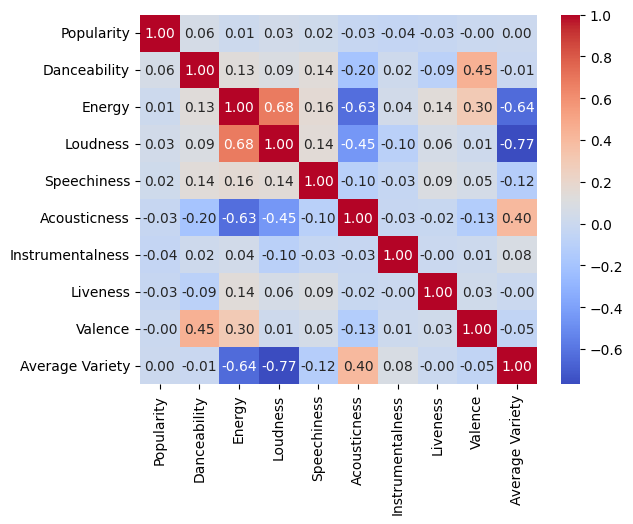

In [130]:
# Correlation between the numerical columns: Popularity	Danceability	Energy	Key	Loudness	Mode	Speechiness	Acousticness	Instrumentalness	Liveness	Valence	
columns = ['Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence' , 'Average Variety' ]


sns.heatmap(df[columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")


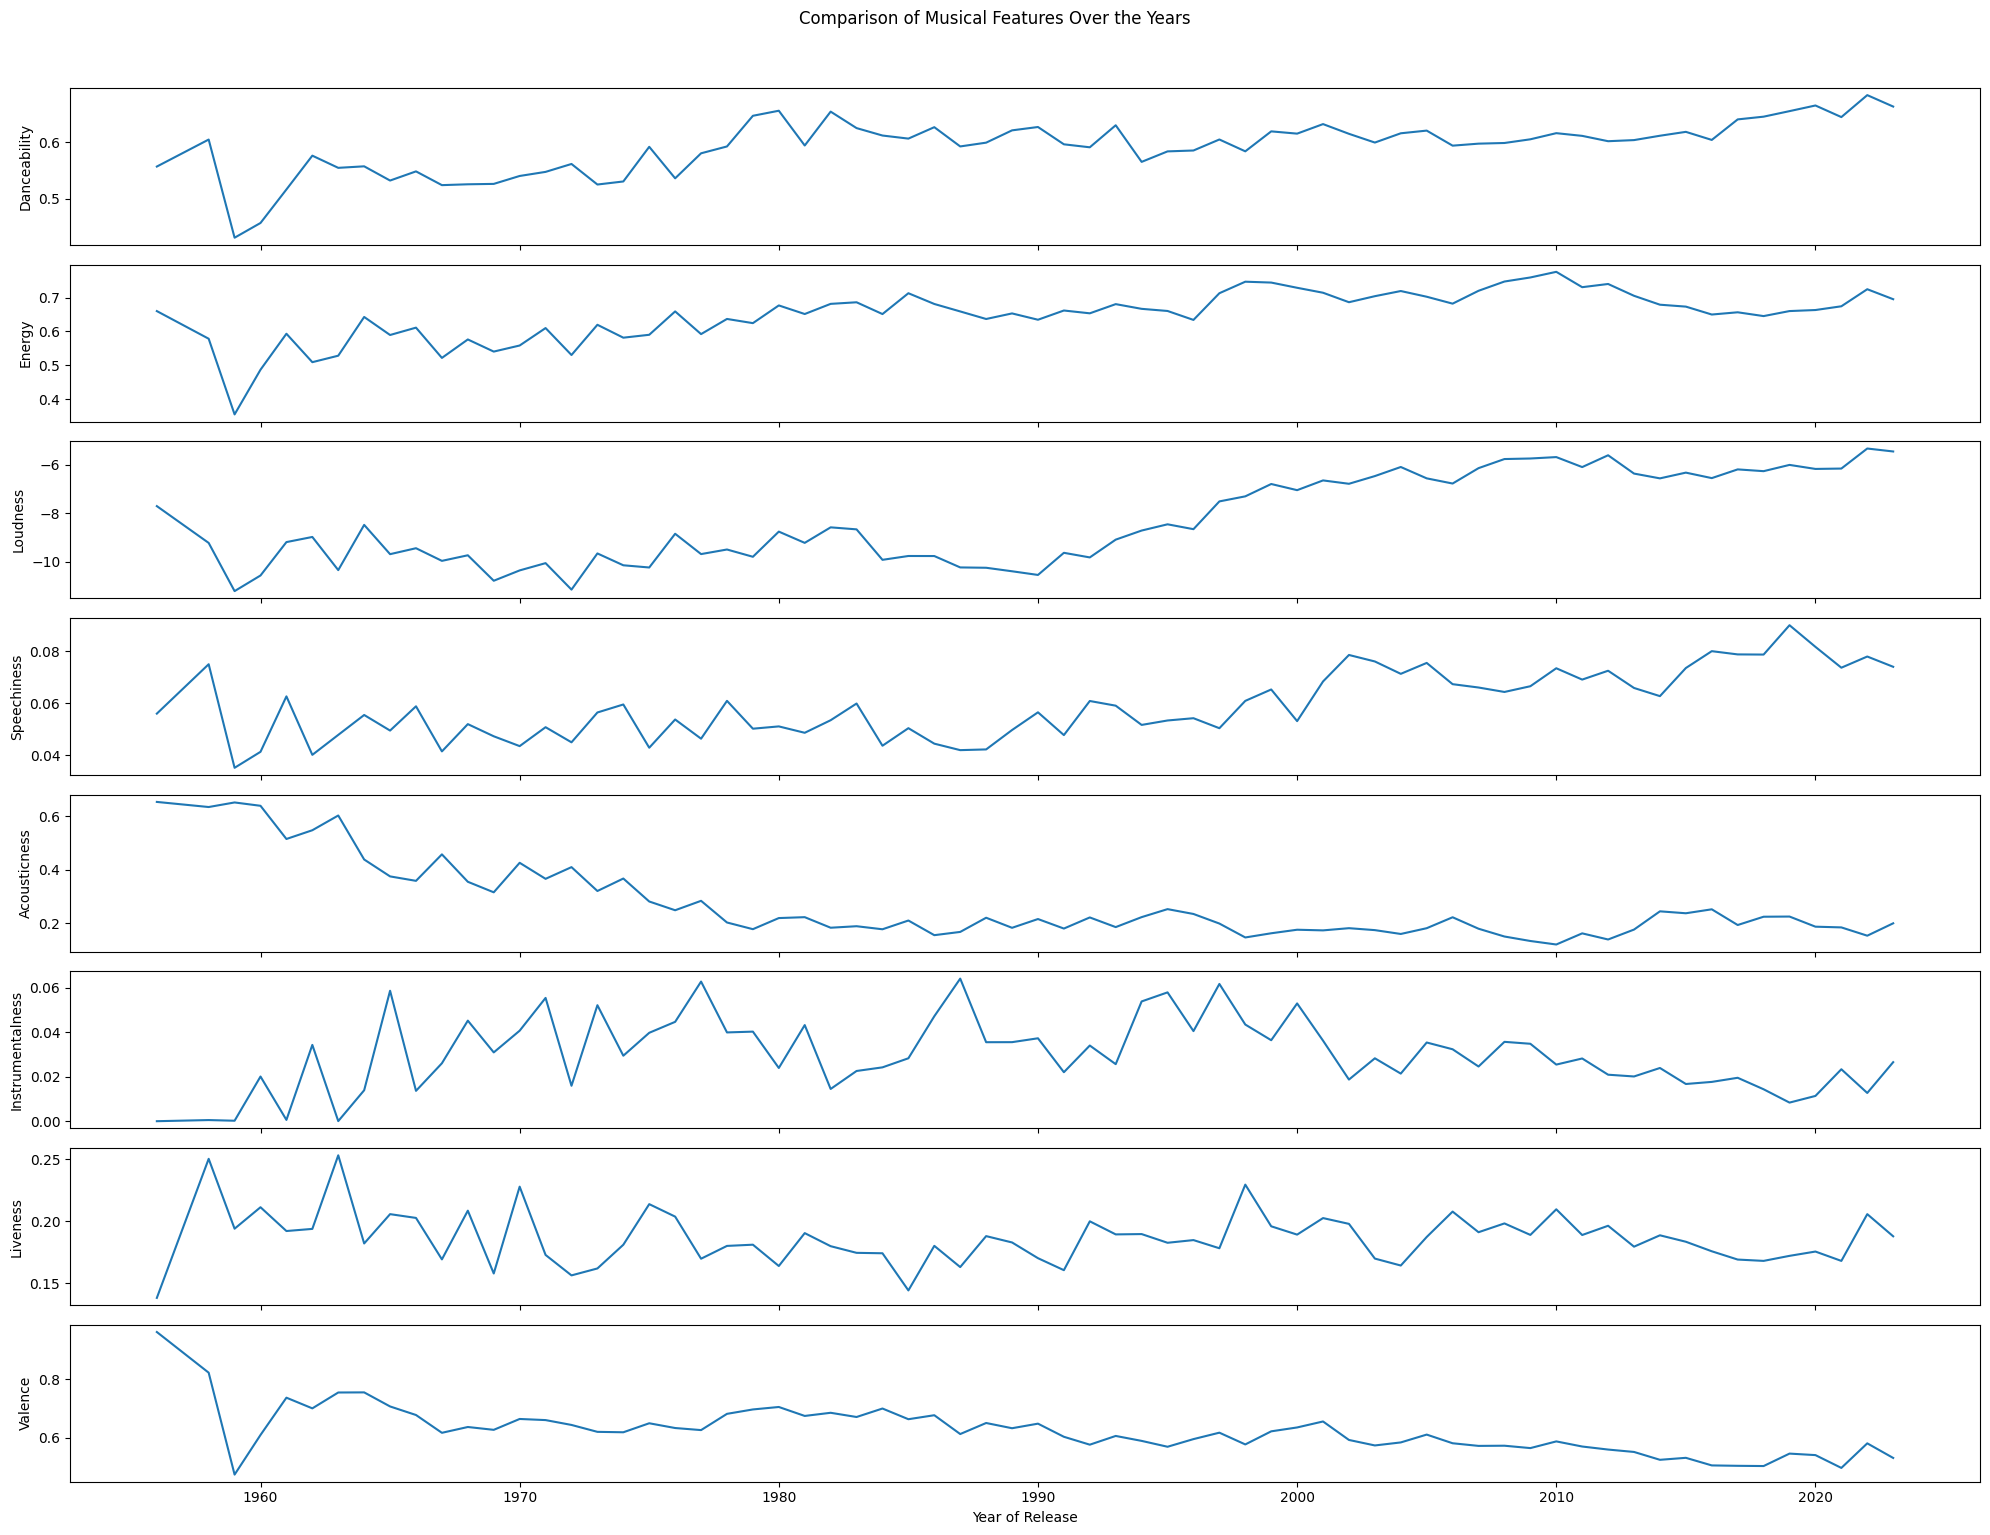

In [140]:
# Comparing each aspect of a song over the years to see whats changed.
group_by_year = df.groupby("Year of Release")
columns_to_compare = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence']
group_by_year_mean = df.groupby("Year of Release")[columns_to_compare].mean().reset_index()

fig, axes = plt.subplots(nrows=len(columns_to_compare), figsize=(20, 15), sharex=True)

# Iterate over columns and plot each feature
for i, column in enumerate(columns_to_compare):
    sns.lineplot(data=group_by_year_mean, x="Year of Release", y=column, ax=axes[i])
    axes[i].set_ylabel(column)

# Add labels and title
axes[-1].set_xlabel("Year of Release")
plt.suptitle("Comparison of Musical Features Over the Years", y=1.02)

# Adjust layout
plt.tight_layout()
plt.show()

In [132]:

# Most popular song of for each year?
group_by_popularity = df.groupby("Year of Release")
# getting the most popular of each year
rows = group_by_popularity['Popularity'].idxmax()
most_popular_of_each_year = df.loc[rows, ['Track Name', 'Year of Release']]
most_popular_of_each_year['Year of Release'] = most_popular_of_each_year['Year of Release'].astype(int)
most_popular_of_each_year.set_index('Year of Release', inplace=True)
most_popular_of_each_year


,Track Name
Year of Release,
1956,Blue Suede Shoes
1958,Jailhouse Rock
1959,Beyond the Sea
1960,At Last
1961,Can't Help Falling in Love
...,...
2019,Lover
2020,Blinding Lights
2021,Ghost


- Variety of the albums over time.


<Axes: xlabel='Year of Release'>

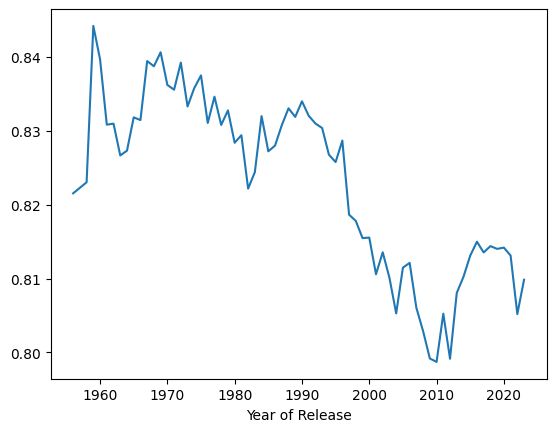

In [133]:

quality_over_time = df.groupby("Year of Release")
# ploting the mean of average quality over time.
quality_over_time['Average Variety'].mean().plot()


The average variety is a good estimator of how diverse the song is, the diversity of the music has dropped over the years. Note: The 2023 has a lot of songs that did not have a release year.

Getting the top 10 artists with the highest average quality, with at least 20 songs published.

In [134]:

best_artists = df.loc[df['Number of Songs'] > 20]
best_artists_top_10 = best_artists.copy()
best_artists_top_10['Mean Variety'] = best_artists_top_10.groupby("Artist Name(s)")['Average Variety'].transform('mean')
best_artists_top_10[['Mean Variety', 'Artist Name(s)']].set_index("Artist Name(s)").sort_values(ascending=False, by="Mean Variety").drop_duplicates()[0:20]

,Mean Variety
Artist Name(s),
John Farnham,0.842076
Bee Gees,0.841975
Elvis Presley,0.839387
Elton John,0.836774
Queen,0.833103
U2,0.828338
The Rolling Stones,0.823993
Coldplay,0.822912
Adele,0.822524


Most popular genre for each year.

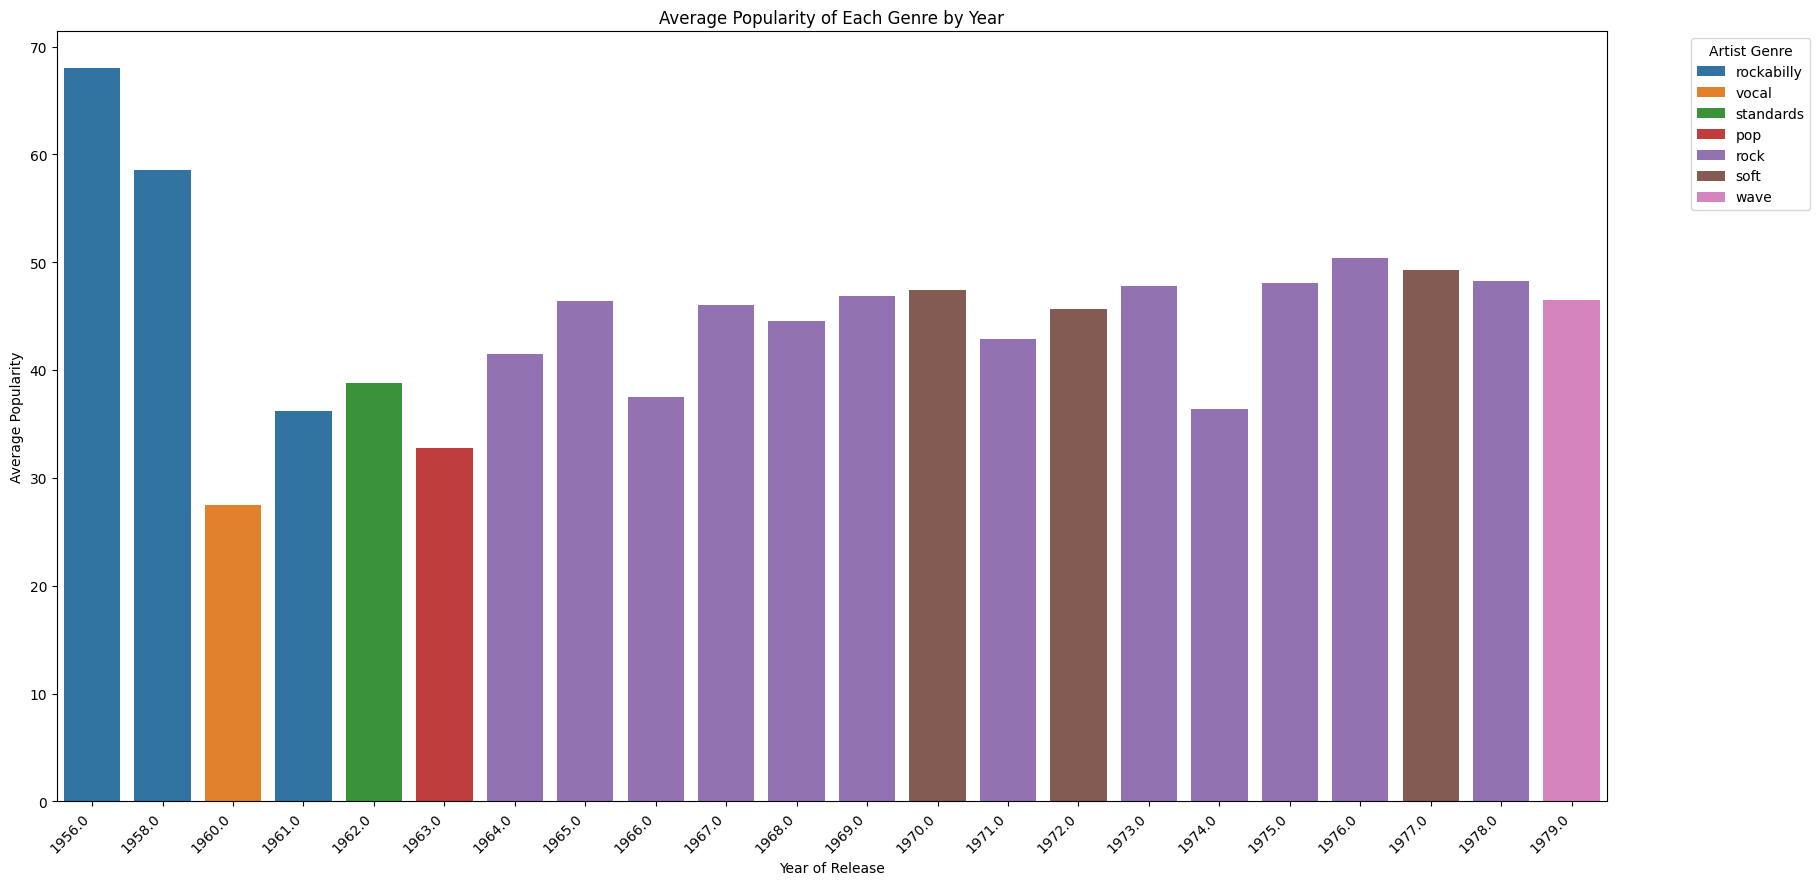

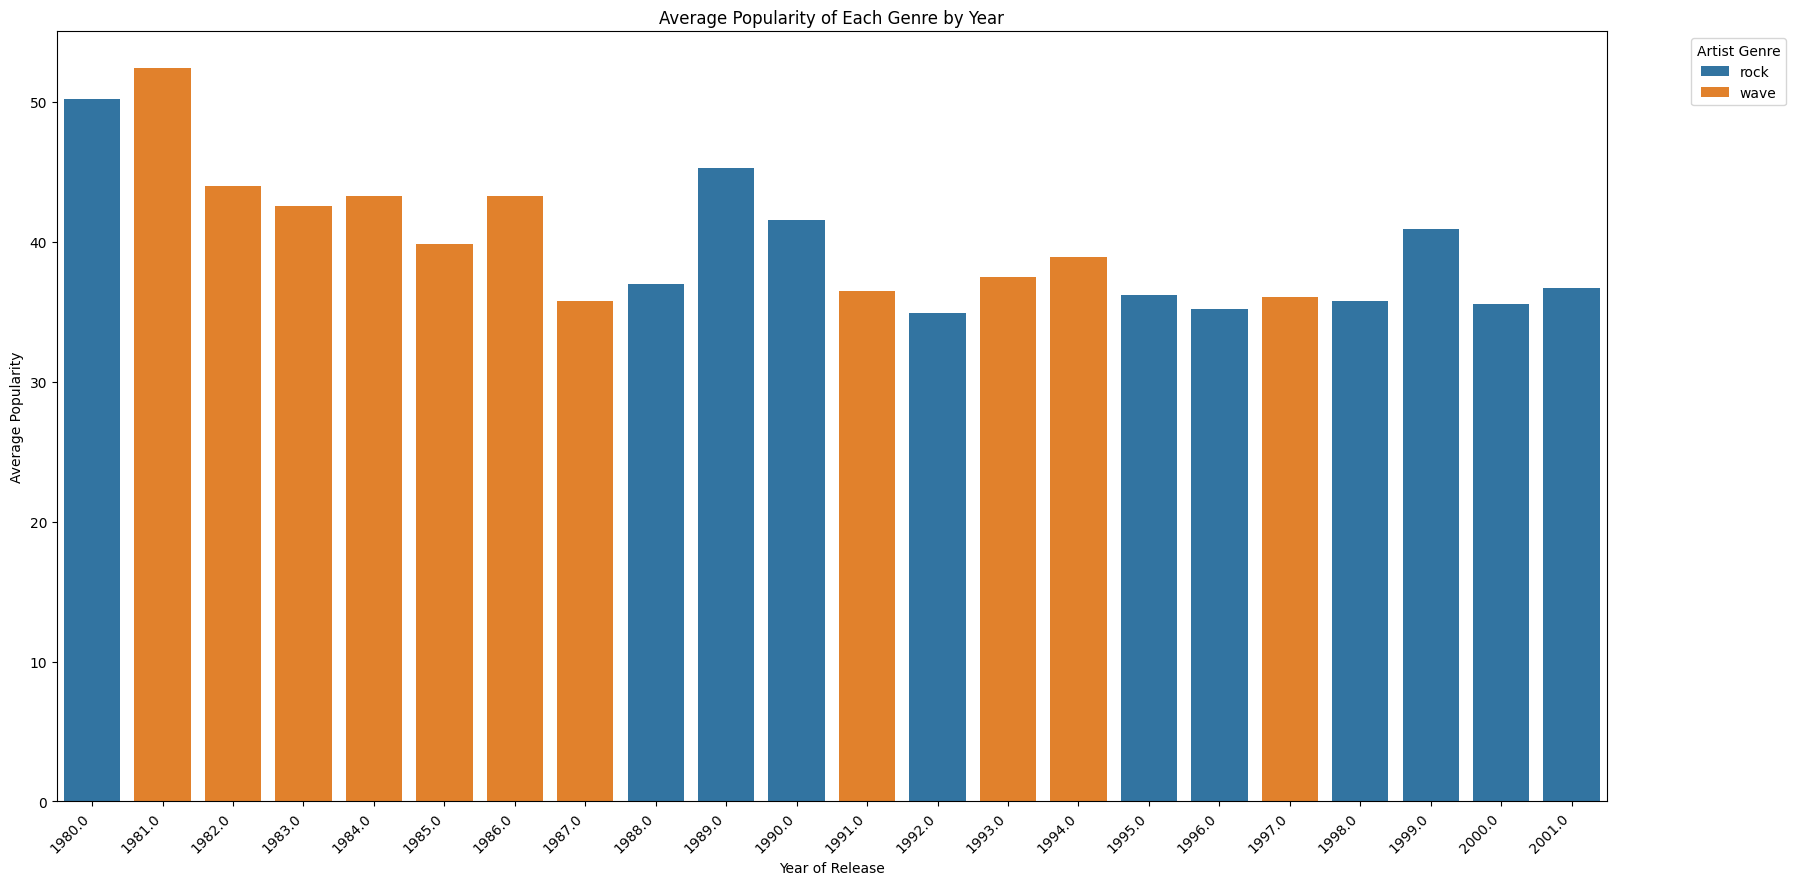

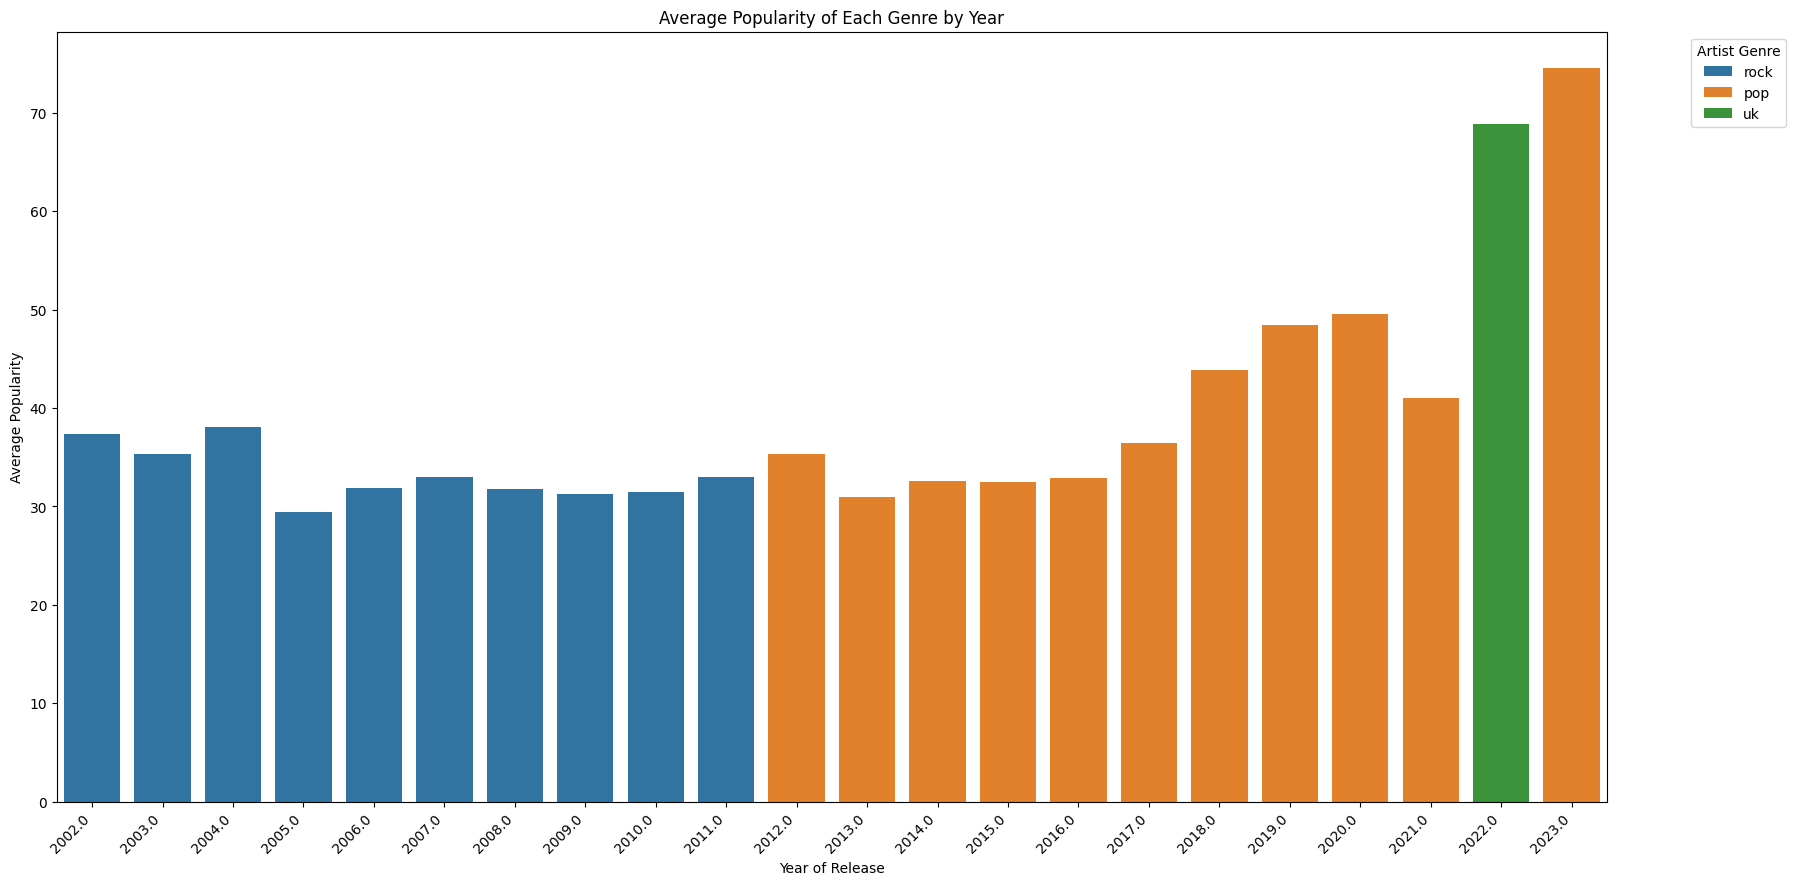

In [181]:
most_popular_genre = df.copy()
def most_common_genre(series):
    return series.mode().iloc[0] if not series.mode().empty else None

columns_to_mean = ['Popularity']

# Specify aggregation functions for each column
aggregation = {'Popularity': 'mean', 'Artist Genre': most_common_genre}
result_df = most_popular_genre.groupby("Year of Release").agg(aggregation)
result_df = result_df.loc[result_df['Artist Genre'] != 'nan']
num_subplots = 3
size = len(result_df)
subset_size = size // num_subplots

for i in range(num_subplots):
    start_idx = i * subset_size
    end_idx = (i + 1) * subset_size
    plt.figure(figsize=(20, 10))
    sns.barplot(x='Year of Release', y='Popularity', hue='Artist Genre', data=result_df.iloc[start_idx:end_idx])
    plt.xticks(rotation=45, ha='right')
    plt.title('Average Popularity of Each Genre by Year')
    plt.xlabel('Year of Release')
    plt.ylabel('Average Popularity')
    plt.legend(title='Artist Genre', bbox_to_anchor=(1.05, 1), loc='upper left')



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming data is your DataFrame and x_labels is a list of 60 labels
sns.barplot(x='your_x_variable', y='your_y_variable', data=data)
plt.xticks(rotation=45, ha='right')
plt.show()


Step 5: Formulating at least 3 hypothesis about this data.
## Temporal Trends in Music Characteristics:
- **Hypothesis:** The average values of 'Danceability,' 'Energy,' and 'Loudness' have changed over the years, reflecting evolving trends in music styles and production techniques. This could be investigated by grouping the data by 'Year of Release' and analyzing the trends in these features.

## Genre Influence on Popularity:
- **Hypothesis:** Certain genres tend to have higher average 'Popularity' scores than others. This can be explored by grouping the data by 'Artist Genre' and analyzing the mean 'Popularity' scores within each genre. It might reveal which genres are more likely to produce popular songs.

## Impact of Explicit Content on Popularity:
- **Hypothesis:** Songs marked as 'Explicit' might have different average 'Popularity' scores compared to non-explicit songs. This can be tested by comparing the mean 'Popularity' scores for explicit and non-explicit songs. It could provide insights into whether explicit content is positively or negatively associated with popularity.


# Step 6: Conducting  a formal signficance test for one of the hypothesis and discuss the results.

Null Hypothesis (H0): There is no significant difference in mean 'Popularity' scores between explicit and non-explicit songs.

Alternative Hypothesis (H1): There is a significant difference in mean 'Popularity' scores between explicit and non-explicit songs.


In [136]:

# Impact of explicity content on Popularity.
from scipy.stats import ttest_ind

explicit_popularity = df[df['Explicit'] == 1]['Popularity']
non_explicit_popularity = df[df['Explicit'] == 0]['Popularity']

# Using t_test
t_statistic, p_value = ttest_ind(explicit_popularity, non_explicit_popularity, equal_var=False)

if p_value < 0.05:
    print("Reject the null hypothesis. There is a difference in mean Popularity between explicit and non-explicit songs.")
else:
    print("Fail to reject the null hypothesis. No difference in mean Popularity between explicit and non-explicit songs.")


Reject the null hypothesis. There is a difference in mean Popularity between explicit and non-explicit songs.


In [137]:
# Ordering Genres by the numbers of explicit songs and popularity
explicit_popularity = df.copy()
explicit_popularity = explicit_popularity[explicit_popularity['Explicit']]
aggregation = {'Popularity': 'mean', 'Explicit': 'count'}
result_df = explicit_popularity.groupby("Artist Genre").agg(aggregation)
result_df = result_df.loc[result_df['Explicit'] > 10]
result_df.sort_values(by=['Explicit', 'Popularity'], ascending=[False, False])

,Popularity,Explicit
Artist Genre,,
rap,38.987952,83
pop,42.068493,73
urban,37.264706,68
trap,59.812500,48
rock,42.307692,39
uk,47.777778,27
west,37.041667,24
wave,46.590909,22
nan,28.285714,14


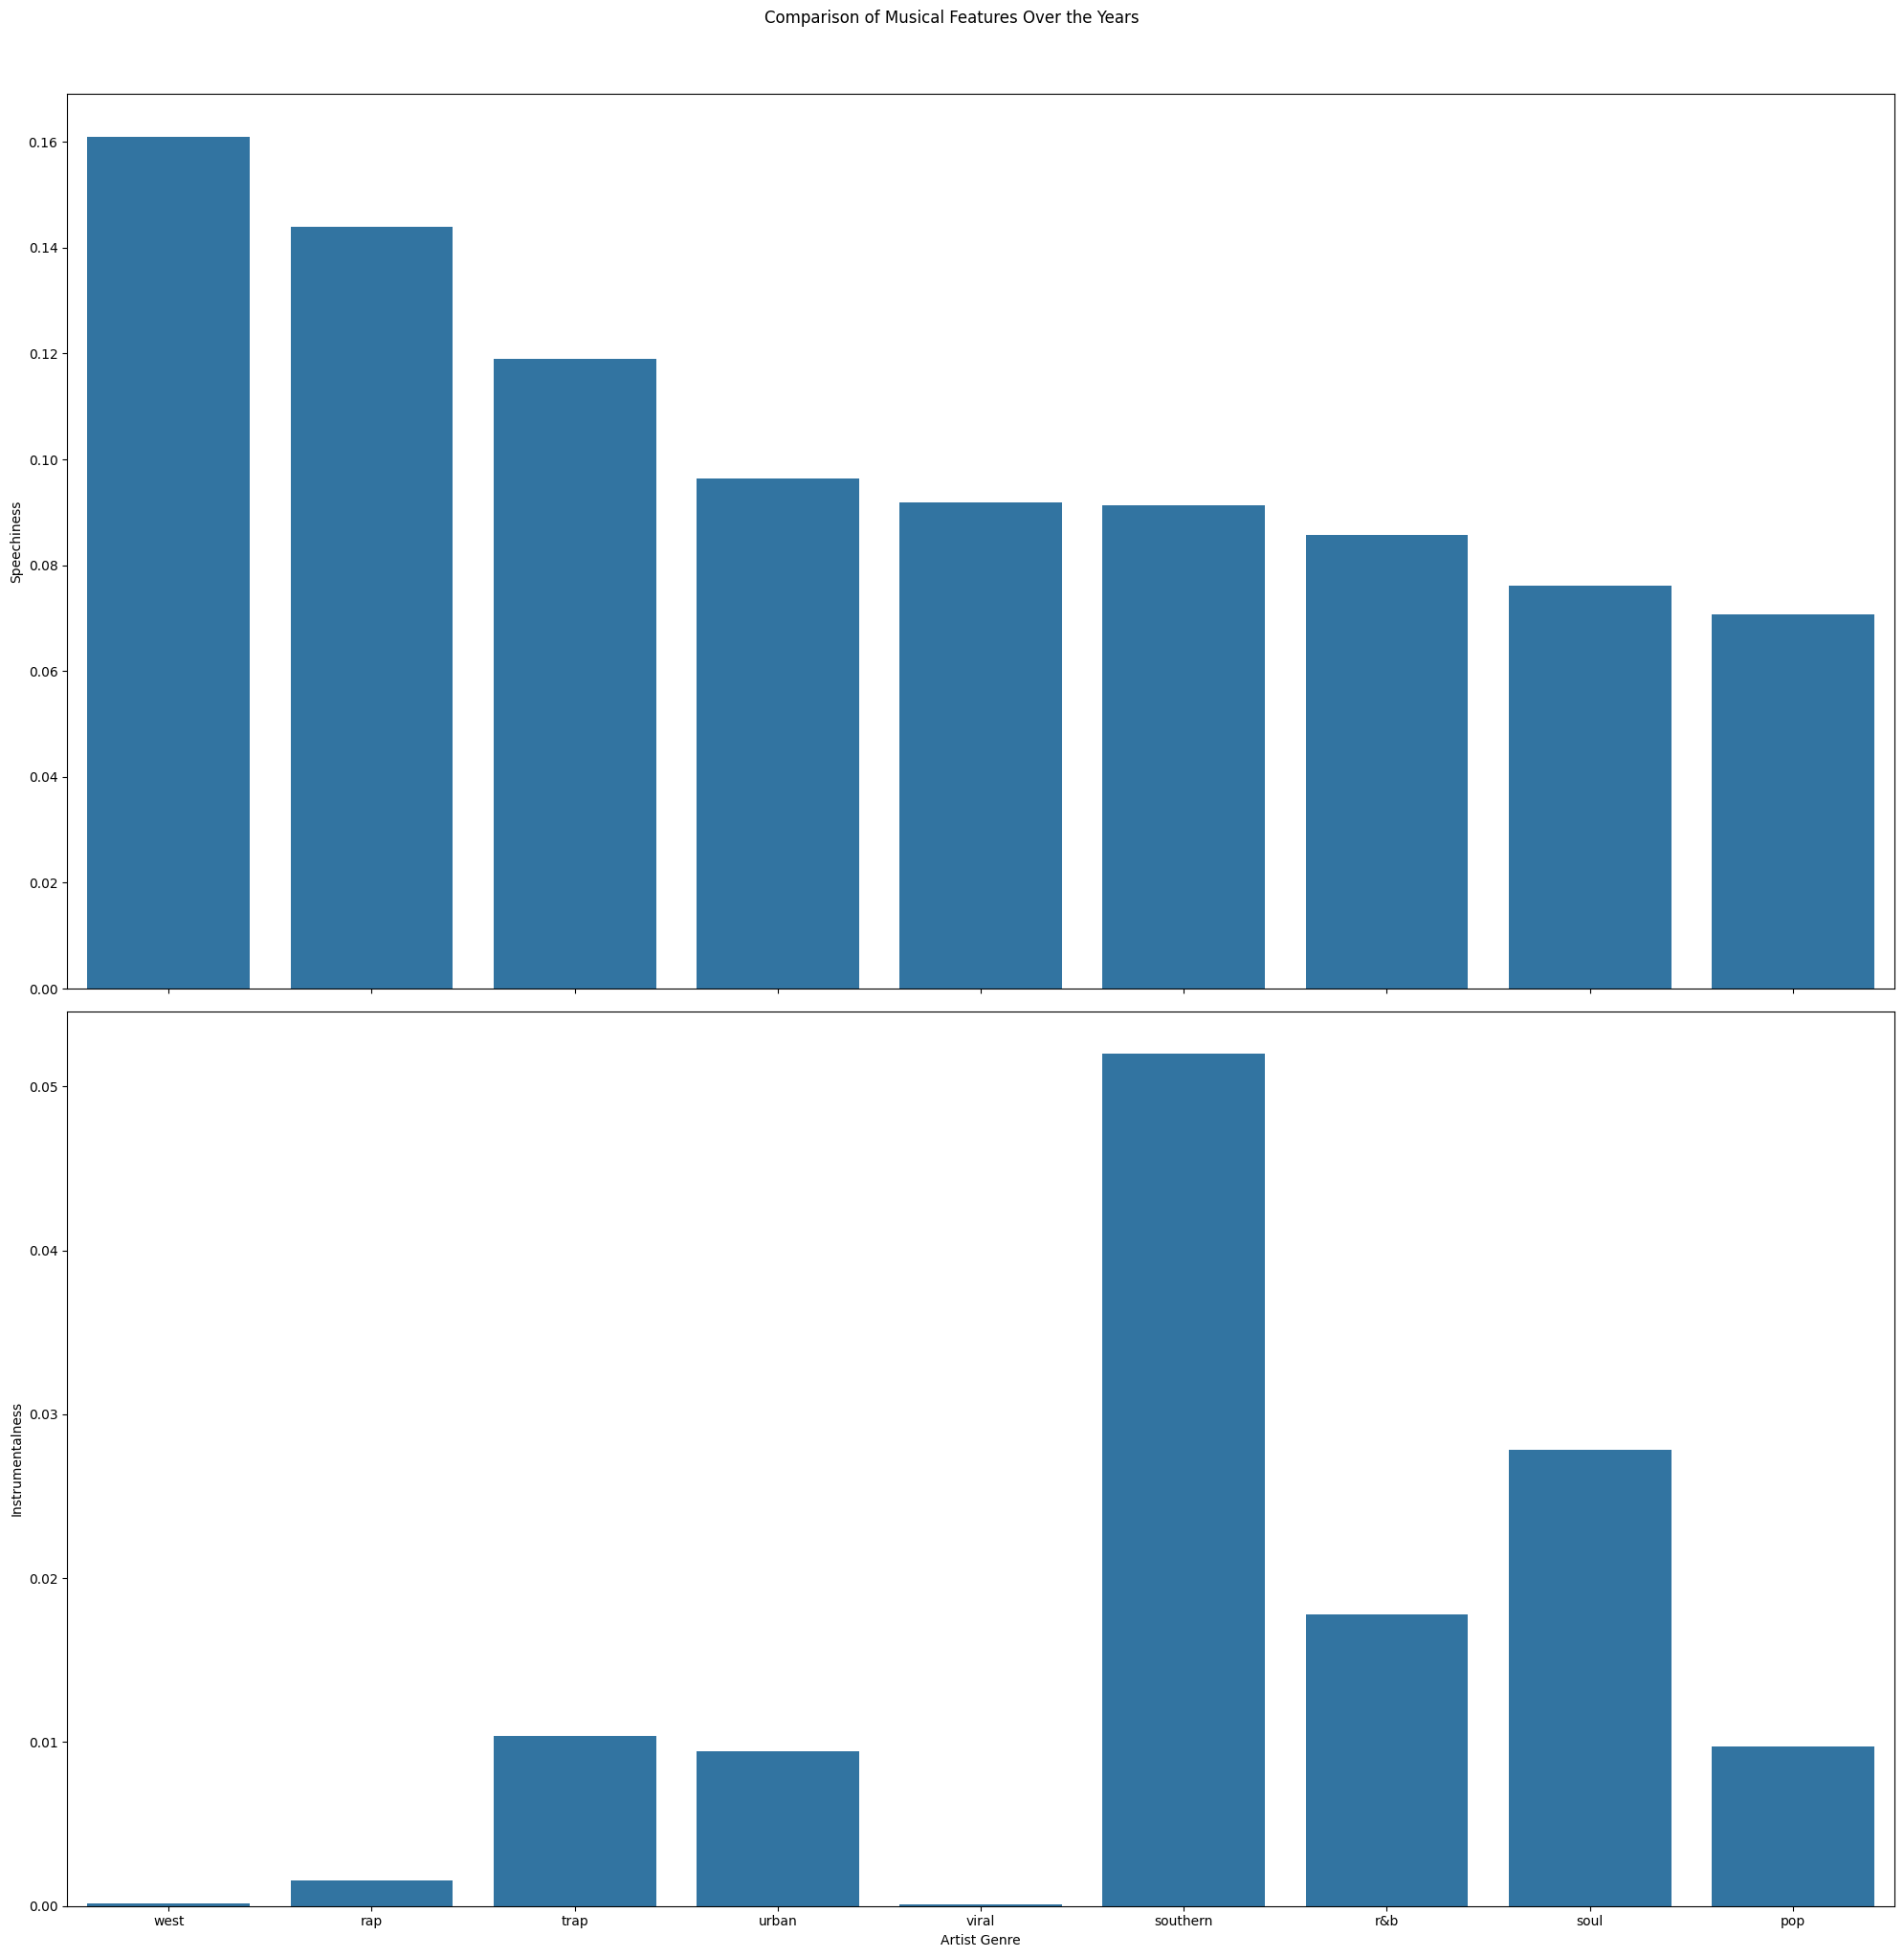

In [138]:
# Comparing each aspect of a song with the genres to prove the speech aspect.
columns_to_compare = ['Speechiness', 'Instrumentalness', 'Number of Songs in Genre']
new_df = df.copy()
new_df['Number of Songs in Genre'] = new_df.groupby('Artist Genre')['Popularity'].transform('count')
aggregation = {'Popularity': 'mean', 'Speechiness': "mean", 'Instrumentalness': "mean", 'Number of Songs in Genre': 'first'}
group_by_genre = new_df.groupby("Artist Genre").agg(aggregation)
group_by_genre = group_by_genre.loc[group_by_genre['Number of Songs in Genre'] > 50]
group_by_genre = group_by_genre[columns_to_compare].reset_index()
group_by_genre = group_by_genre.drop(columns=['Number of Songs in Genre'])
columns_to_compare = ['Speechiness', 'Instrumentalness']
group_by_genre = group_by_genre.sort_values(by="Speechiness", ascending=False)[0:9]
fig, axes = plt.subplots(nrows=len(columns_to_compare), figsize=(20, 20), sharex=True)

# Iterate over columns and plot each feature
for i, column in enumerate(columns_to_compare):
    sns.barplot(data=group_by_genre, x="Artist Genre", y=column, ax=axes[i])
    axes[i].set_ylabel(column)

# Add labels and title
axes[-1].set_xlabel("Artist Genre")
plt.suptitle("Comparison of Musical Features Over the Years", y=1.02)

# Adjust layout
plt.tight_layout()
plt.show()

**H0 is denied** - I think that makes total sense, most explicity songs, tend to be very popular genres, which are focused on speech, which in order to draw attention to the listener it can engaged in more explicit language.

## Step 7: Suggestions for Next Steps in Analyzing This Data

### Create a K-means Model
- Considering the empty 'Album Genre' column, it would be intriguing to explore the possibility of creating a K-means clustering model to assign genres to each album.

Step 8: A paragraph that summarizes the quality of this data set and a request for additional data if needed

- This data set needs its Album Genre column populated.
- But the dataset itself its pretty clean and well maintened.